In [21]:
rain.data=scan("precip.dat",skip=1)
rain.ts <- ts(rain.data, start=c(1813))

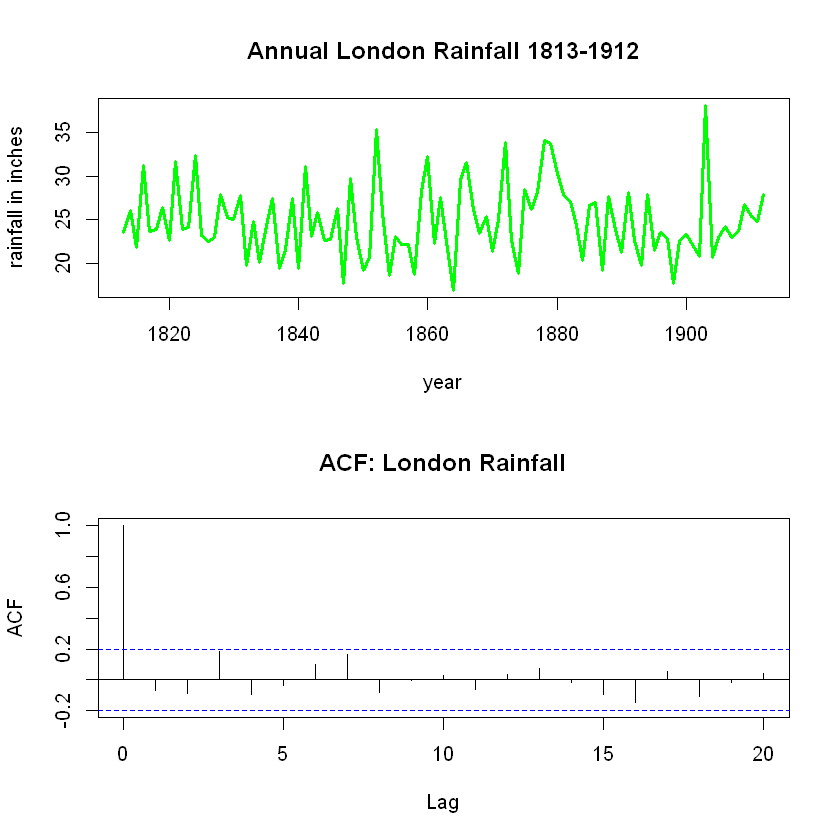

In [22]:
par( mfrow=c(2,1) )
plot.ts(rain.ts, main="Annual London Rainfall 1813-1912",xlab="year", ylab="rainfall in inches", col='green', lwd=3)
acf(rain.ts, main="ACF: London Rainfall")

The data has no seasonality and further looks close to normal distribution.

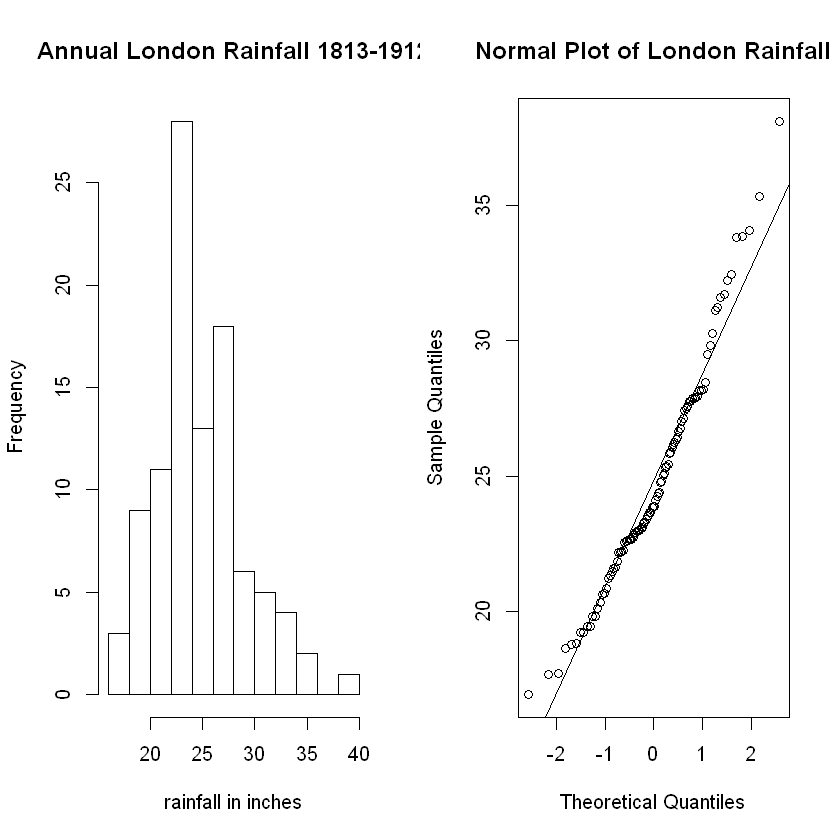

In [23]:
par( mfrow=c(1,2) )
hist(rain.data, main="Annual London Rainfall 1813-1912",xlab="rainfall in inches")
qqnorm(rain.data,main="Normal Plot of London Rainfall")
qqline(rain.data)

Even auto.arima cannot find the order and thinks its white noise.

In [24]:
library(forecast)
auto.arima(rain.ts)

Series: rain.ts 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
         mean
      24.8239
s.e.   0.4193

sigma^2 estimated as 17.76:  log likelihood=-285.25
AIC=574.49   AICc=574.61   BIC=579.7

### SES forecasting with alph = 0.2

In [25]:
alpha=.2 #increase alpha for more rapid decay
forecast.values = NULL #establish array to store forecast values
n = length(rain.data)
#naive first forecast
forecast.values [1] = rain.data[1]
#loop to create all forecast values
for( i in 1:n ) {
forecast.values [i+1] = alpha*rain.data[i] + (1-alpha)* forecast.values [i]
}
paste("forecast for time",n+1," = ", forecast.values [n+1])

[1] "forecast for time 101  =  25.3094062064236"

### Searching best alpha

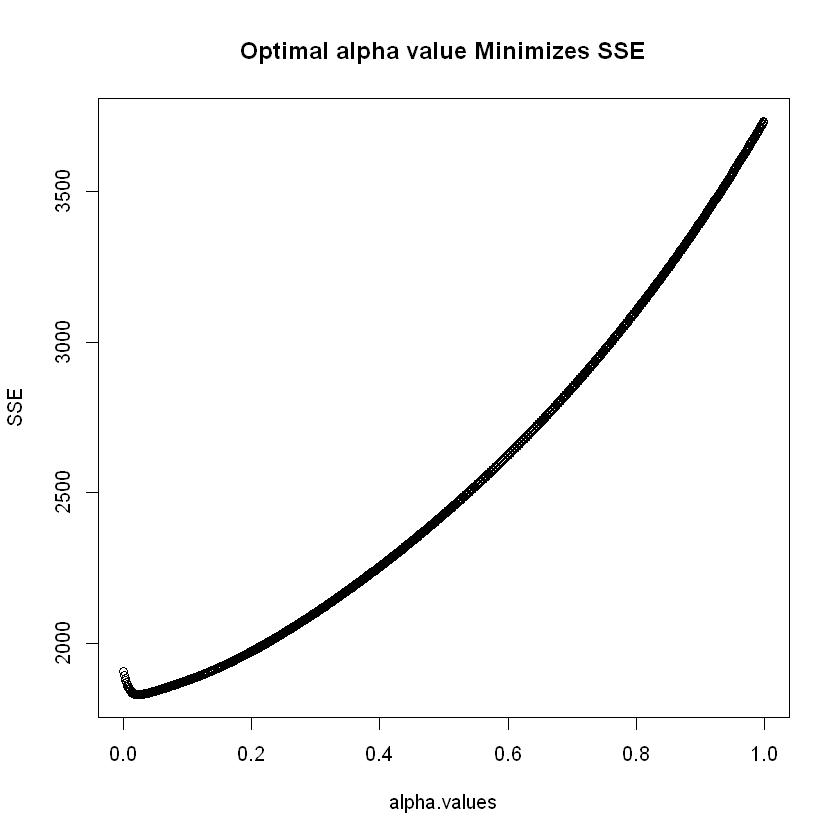

In [26]:
SSE=NULL
n = length(rain.data)
alpha.values = seq( .001, .999, by=0.001)
number.alphas = length(alpha.values)
for( k in 1:number.alphas ) {
    forecast.values=NULL
    alpha = alpha.values[k]
    forecast.values[1] = rain.data[1]
    for( i in 1:n ) {
        forecast.values[i+1] = alpha*rain.data[i] + (1-alpha)*forecast.values[i]
    }
    SSE[k] = sum( (rain.data - forecast.values[1:n])^2 )
}
plot(SSE~alpha.values, main="Optimal alpha value Minimizes SSE")

In [27]:
index.of.smallest.SSE = which.min(SSE) #returns position 24
alpha.values[which.min(SSE)] #returns 0.024

[1] 0.024

### Forecast with best alpha

In [28]:
alpha=0.024
forecast.values = NULL 
n = length(rain.data)
#naive first forecast
forecast.values [1] = rain.data[1]
#loop to create all forecast values
for( i in 1:n ) {
forecast.values [i+1] = alpha*rain.data[i] + (1-alpha)* forecast.values [i]
}
paste("forecast for time",n+1," = ", forecast.values [n+1])

[1] "forecast for time 101  =  24.6771392918524"

The HoltWinters forecast is same when done woth beta gamma as 0

In [29]:
HoltWinters(rain.ts, beta=FALSE, gamma=FALSE)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rain.ts, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819